# How does GANs work and Getting started

**we are going to be using the fashion mnist data set so this is going to allow us to get images of things like t-shirts shoes ,so like it's got a whole bunch of random images that we can actually use for our particular data set so the thing that we're then going to do is we're actually going to have to build up a generator. so generator is going to take in a bunch of random numbers and this is commonly referred to as a
latent dimension so it might be like [1 23 42 71] so on and what that is actually going to output is it's going to take in those random numbers and it's going to output a set of values which represent an image so what we're actually going to do so let's say for example the images that
we're getting back from tfds are going to be in the shape 28 by 28 by 1. we might take in some random values into our generator let's say in our particular case we'll take in 128 random values those 128 values will be reshaped into a format that allows us to output a set of values which are 28 by 28 by 1.

so we'll actually take those 128 values and we'll build up our generator so our generator will be comprised of a number of convolutional neural network layers as well as some up sampling layers and eventually what we are going to get probably going to output an image which is 28 by 28 by one which is effectively a generated image.


now this is where the discriminator comes in we'll actually take the generated image and pass it through a discriminator neural network and that is again going to have a number of convolutional neural network layers but the final output for that neural network is going to be a zero
or a one which represents whether or not it's a true or a fake image so we've set it up so that zero represents true
and 1 represents fake now other implementations might do this a little bit differently but this is definitely
going to work so we'll then take that generated image and bang it into our discriminator at the same time we'll also take real images all the way from tf-ds
so that will come from our tfts model and we'll be able to train our discriminator as to what is real and what is fake

finally when it comes to actually testing this model we can actually take the generator model specifically discard the discriminator because we don't really need it anymore it's purely needed for training we can then pass through those 128 random variables to
our generator let's say that this is our generator is represented as a pink modelcan mod and then what that is going to do is it's going to output our different images of fashion so we might get a t-shirt we might get a boot**

In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

In [3]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.OYRHUI_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.OYRHUI_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
ds.as_numpy_iterator().next()['label']

2

DATA VISUALIZATION AND PREPROCESSING

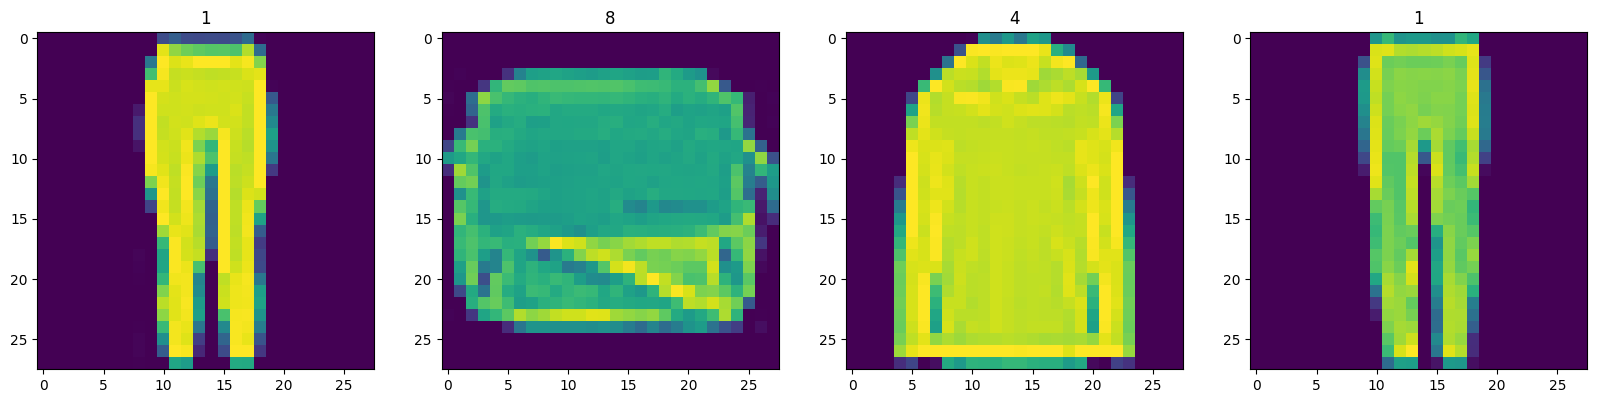

In [5]:
import numpy as np
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()
# Getting data out of the pipeline
dataiterator.next()['image']
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx in range(4): 
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(sample['label'])

# preprocessing and making Data pipeline for images for better dl model training

In [6]:
# Scaling images between 0 and 1 and returning images 
def scale_images(data): 
    image = data['image']
    return image / 255

# Reload the dataset 
ds = tfds.load('fashion_mnist', split='train')

#Data pipeline steps for tensorflow 

# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images) 


# Cache the dataset for that batch 
ds = ds.cache()

# Shuffle it up to ensure variety every time we run 
ds = ds.shuffle(60000)

# Batch into 128 images per sample
ds = ds.batch(128)

# Reduces the likelihood of bottlenecking 
ds = ds.prefetch(64)


In [7]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

****we'll build two models now ,the generator model will be built to try to generate images of clothing and fashion the discriminator will try to learn to spot the fakes so thengenerator is almost like an artist trying to forge things and the discriminator is an art critic trying to spot them out ****

In [8]:
#sequential api for generator and discriminator
from tensorflow.keras.models import Sequential
#layers for NN, Convo2d to perform convolution in both gen and dis,a flattened which allows us to flatten a set of dimensions or vectors or matrices
#we are then bringing the reshape layer which allows us to transform what the output from a previous layer looks like
#LeakyRelu is an activation layer,Dropout a form of regularization and sampling which is going to be used for our generator to up sample the images and bbring in a little more depth and space to our images
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D


# Building the Generator

In [9]:
def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model

our input layers is going to be a fully connected dense layer with number of units of 7*7*128.... we going to be passing through a random 128 random values to our generator to help determine what to generate. We dont have much control which this GANS unlike conditional GANs.convert this into an image we want to give it some spatial qualities right so we're actually going to convert it into a shape of 7 by 7 by 128 and that is what our dense layer is going to do so the number of units that we're going to have is going to be 7 by 7 by our random variable

we're specifying that we want to apply a leaky relu after the fact this allows us to cater for non-linearities in our model 

then we're reshaping it and this is what now gives us our spatial quality so we're passing through model.add and then
we're passing through a reshape layer which takes our dense output which is really just going to be 6272 values and we're going to effectively be converting it to the beginnings of a image 

our model is not complete because right now it's still outputting seven by seven by 128 which is not in the correct dimensions for a generated image it needs to be 28 by 28 by one.
using the conf 2d layers and we're also going to be using the up sampling 2d layers to get us to 28 by 28 by 1.

take a look at that in a second but uh so our convolutional neural network layer is going to be have 128 units
that's going to preserve the number of channels our kernel size is going to be five by five and our padding is going to
be the same so uh it should effectively not crop but we will see actually it will crop because we're using a bigger
filter but we will see in a second and then we are passing through our activation which is going to be a leaky
relu again so let's run this so now okay so it didn't crop so now our output is now 14 by 14 by 128.

if we really wanted to we could actually just apply the exact same up sampling block so we could literally just take this again and change the number of filters here let me actually show you rather than talking about it right so if i grab this pasted that there and said rather than having 128 kernels here give me one boom boom boom take a look that is our output layer now outputting the same shape as an image so we could actually stop there but there's not really enough typically you want to add in a bunch more layers for your convolute for your generator because this gives it a little bit more sophistication in terms of actually being able to generate something which is sufficiently complex to look like a generated image so we are not going to do that just yet we're going to add in a bunch more layers in between there to give us a little bit more information.

the same padding so it really shouldn't just change the size of our output again we're going doing the exact same so this
is really just giving us more knowledge or the ability to pass you have more parameters in our deep neural network to learn a little bit better so really it should be 28 by 28 by 128\

our final layer so this is going to remember we want it to be one channel so previously we would have had 128 channels based on all the kernels that we had in our convolutional neural network layers because we now
have one filter we're only going to get one channel out in our image or our generated image but remember we
preserved the shape so we had 28 by 28 and this was really just by passing it through two different up sampling layers
we went from 7 to 14 14 to 28

In [10]:
generator=build_generator()
generator.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


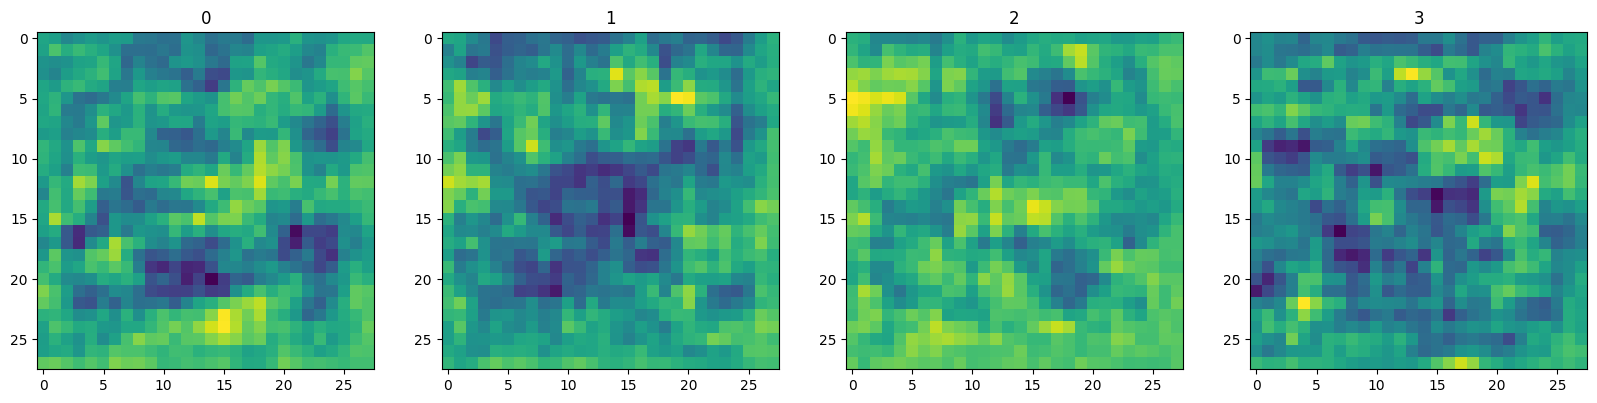

In [11]:
img = generator.predict(np.random.randn(4,128,1))
# Generate new fashion
img = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(img): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

As one might expect, the output from the generator is basically random noise, since we haven't trained it yet.

# Building Discriminator 
The discriminator takes an image as input, and tries to classify it as "real" or "generated". In this sense, it's like any other neural network. We'll use a convolutional neural networks (CNN) which outputs a single number output for every image. 

In [12]:
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 

In [13]:
discriminator = build_discriminator()
discriminator.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

# Construct training loop

In [20]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy
g_opt = Adam(learning_rate=0.0001) 
d_opt = Adam(learning_rate=0.00001) 
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

**Build subclassed model**

In [21]:
# Importing the base model class to subclass our training step 
from tensorflow.keras.models import Model

In [22]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args(posititonal args) and kwargs(keyword args) to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data (in our case its going to be 128 images of the size  28 by 28 by1)
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [23]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

**Building callback**

In [24]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [25]:
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
  2/469 ━━━━━━━━━━━━━━━━━━━━ 1:39:02 13s/step - d_loss: 0.6946 - g_loss: 0.6938

KeyboardInterrupt: 

**Review Performance**

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# Test out the generator

In [ ]:
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))
imgs = generator.predict(tf.random.normal((16, 128, 1)))
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])